# Step 1: Reading and Understanding the Data
Let's start with the following steps:

Importing data using the pandas library
Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Step 2. Load and Explore Dataset

In [2]:
# Read the given CSV file, and view some sample records

bike_data = pd.read_csv("download.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Let's inspect the various aspects of our dataframe
bike_data.shape

(730, 16)

In [4]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Step 3 : Prepare the Data


In [6]:
# Map categorical variables
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_mapping = {
    1: 'Clear',
    2: 'Cloudy',
    3: 'Rain',
    4: 'Heavy Rain'
}

bike_data['season'] = bike_data['season'].map(season_mapping)
bike_data['weathersit'] = bike_data['weathersit'].map(weather_mapping)

In [7]:
# Drop unnecessary columns
bike_data.drop(columns=['instant','dteday'], inplace=True)

In [8]:
# Drop 'casual' and 'registered' as they contribute to 'cnt'
bike_data = bike_data.drop(['casual', 'registered'], axis=1)

In [9]:
# Check the first few rows of data
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 4. Perform Exploratory Data Analysis (EDA)

## Pair Plot

<Figure size 800x500 with 0 Axes>

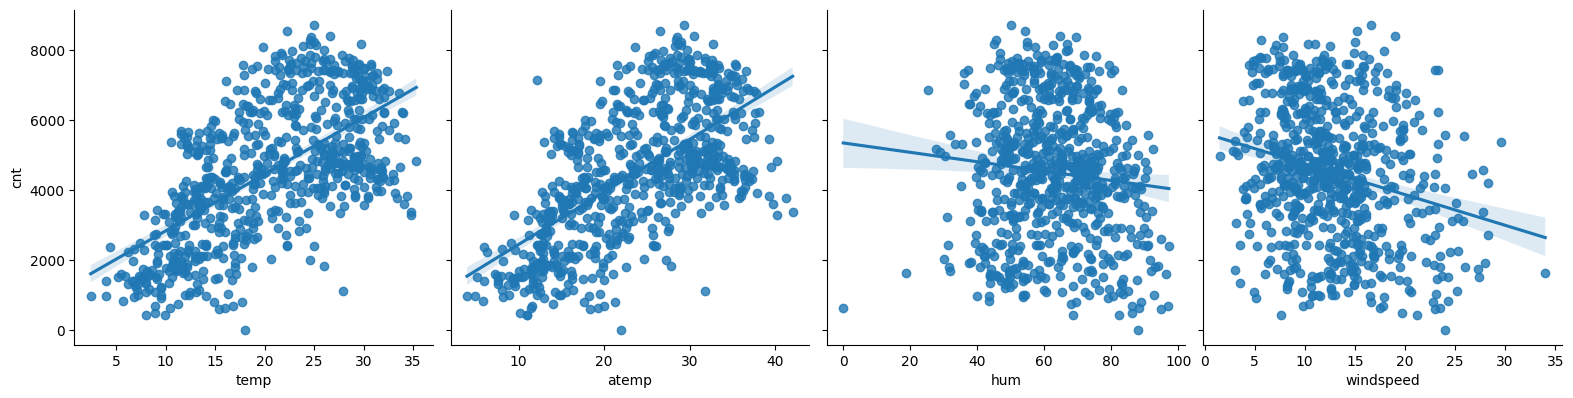

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between temperature and bike demand
plt.figure(figsize=(8, 5))
sns.pairplot(bike_data,x_vars=['temp', 'atemp', 'hum', 'windspeed'] ,y_vars='cnt',size=4, aspect=1, kind='reg')
plt.show()

## BOX Plot

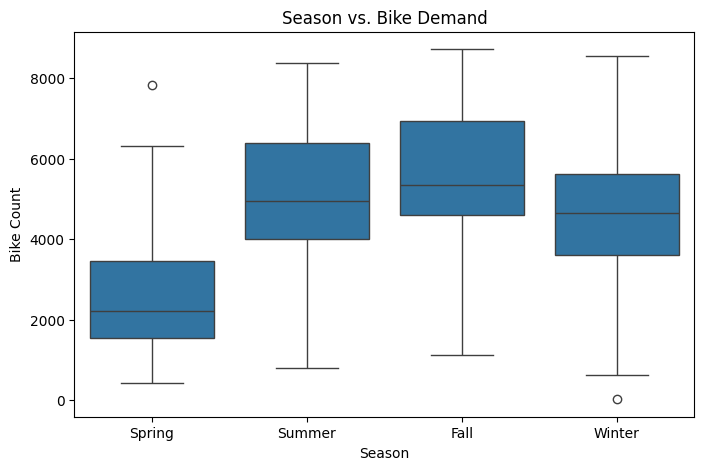

In [11]:
# Analyze categorical variables
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=bike_data)
plt.title('Season vs. Bike Demand')
plt.xlabel('Season')
plt.ylabel('Bike Count')
plt.show()

## Heatmap

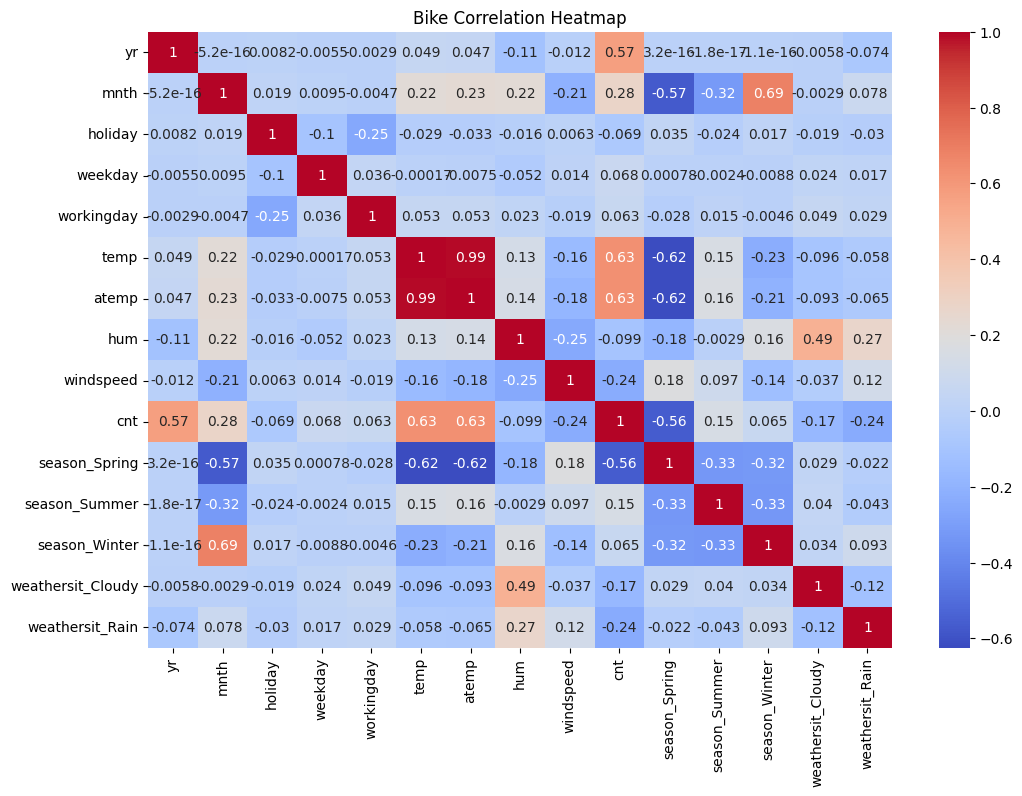

In [12]:
# Correlation heatmap
bike_data = pd.get_dummies(bike_data, columns=['season', 'weathersit'], drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(bike_data.corr(), annot=True, cmap='coolwarm')
plt.title('Bike Correlation Heatmap')
plt.show()

# Step 5: Split the data into features and target

In [13]:
# Split the data into features and target
X = bike_data.drop(columns=['cnt'])
y = bike_data['cnt']

X.head()
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

# Step 6:Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Display Train Shapes
X_train.shape


(584, 14)

In [16]:
# Display Test Shapes
X_test.shape

(146, 14)

## Selection Using RFE (Recursive Feature Elimination)

In [17]:
# Train a linear regression model
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get selected features
best_features = X_train.columns[rfe.support_]
print("Best Features:\n", best_features)

Best Features:
 Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'season_Spring',
       'season_Summer', 'season_Winter', 'weathersit_Cloudy',
       'weathersit_Rain'],
      dtype='object')


## Prepare Train and Test Sets with Selected Features

In [18]:
# Filter selected features
X_train_rfe = X_train[best_features]
X_test_rfe = X_test[best_features]

In [19]:
# Train the model
model.fit(X_train_rfe, y_train)

LinearRegression()

In [20]:
# Predict on training and test sets
y_train_pred = model.predict(X_train_rfe)
y_test_pred = model.predict(X_test_rfe)

# Step 7: Model Evaluation

In [21]:
# Evaluate R-Squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [22]:
# Evaluate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [23]:
print(f"Train R² Score Value: {train_r2:.2f}")
print(f"Test R² Score Value: {test_r2:.2f}")
print(f"Train RMSE Value: {train_rmse:.2f}")
print(f"Test RMSE Value: {test_rmse:.2f}")

Train R² Score Value: 0.81
Test R² Score Value: 0.84
Train RMSE Value: 852.20
Test RMSE Value: 737.77


# Step 8: Residual Analysis

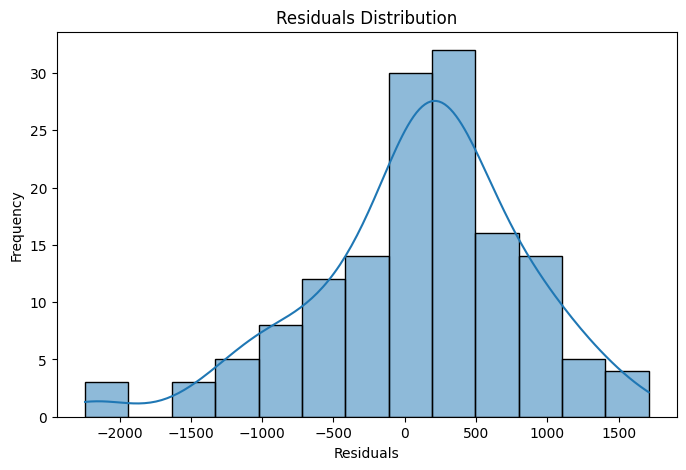

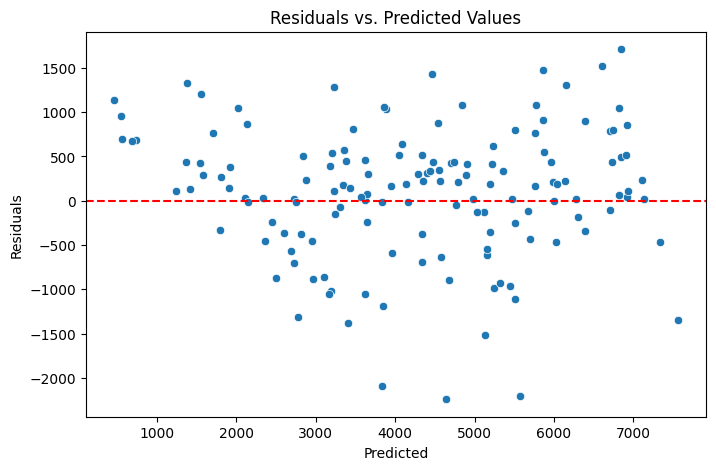

In [24]:
# Residuals for the test set
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()


# Model Performance Evaluation and Explanation

## Train R² Score: 0.81
 --> The model accounts for 81% of the variance in the training dataset, indicating good performance on known data.

## Test R² Score: 0.84

 --> The model explains 84% of the variance in the unseen test dataset, showcasing strong generalization capability.

## Train RMSE: 852.20

 --> Root Mean Squared Error (RMSE) reflects the average prediction error in the training set.
 
 --> A lower RMSE indicates that the model makes accurate predictions on the training data.
## Test RMSE: 737.77

 --> RMSE on the test set quantifies the prediction error for unseen data.
 
 --> The lower test RMSE suggests effective generalization and reduced prediction errors.

## Conclusion
 --> The model demonstrates robust performance on both training and test datasets, with slightly better generalization on unseen data.
 
 --> The high R squred scores indicate that the model captures a significant proportion of the variance in the target variable.
 
 --> The relatively low RMSE values confirm that the model delivers reliable predictions with minimal average errors.